# EDA

In [121]:
import pandas as pd
import numpy as np

# Graph visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Map visualizations
import folium
import folium.plugins as plugins
#from mpl_toolkits.basemap import Basemap

## Restaurant

In [4]:
# Load data

restaurants = pd.read_csv('../data/yelp_restaurants.csv')
restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories
0,VBVqHnViRLSYAqP7v8iNNQ,JalapeÃ±o Inferno,20825 N Pima Rd,Scottsdale,AZ,85255,33.674880,-111.888635,3.5,247,"{'RestaurantsTakeOut': 'True', 'GoodForKids': ...",Mexican
1,UZ34XAw1GJ3chCOuKL69Mg,Garcia's,1706 E Warner Rd,Tempe,AZ,85284,33.334835,-111.912521,3.0,119,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...",Mexican
2,K4rLi2Mqz931v07nMSih5w,Chipotle Mexican Grill,"7014 E Camelback Rd, Ste 580",Scottsdale,AZ,85251,33.503687,-111.929381,1.5,28,"{'GoodForMeal': ""{'dessert': False, 'latenight...",Mexican
3,uE6bl1eTHJ4CLkq6NM3KUg,Fat Bastard Burrito,30 Eglinton Ave W,Mississauga,ON,L5R 3E7,43.605703,-79.652542,2.0,6,"{'GoodForMeal': ""{'dessert': False, 'latenight...",Mexican
4,ZsKWULhwwB61RHzCrb1i9A,Blue Burrito Grille,5757 Wayne Newton Blvd,Las Vegas,NV,89119,36.080542,-115.146459,2.5,31,"{'RestaurantsDelivery': 'False', 'GoodForKids'...",Mexican


In [5]:
# Dimensions of the data set

print(f'The dataset has {restaurants.shape[0]} rows and {restaurants.shape[1]} columns')

The dataset has 24176 rows and 12 columns


In [6]:
# Description of datatypes

restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24176 entries, 0 to 24175
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   24176 non-null  object 
 1   name          24176 non-null  object 
 2   address       24067 non-null  object 
 3   city          24176 non-null  object 
 4   state         24176 non-null  object 
 5   postal_code   24152 non-null  object 
 6   latitude      24176 non-null  float64
 7   longitude     24176 non-null  float64
 8   stars         24176 non-null  float64
 9   review_count  24176 non-null  int64  
 10  attributes    23735 non-null  object 
 11  categories    24176 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 2.2+ MB


In [7]:
# Percentage of null values

restaurants.isnull().mean().round(4)

business_id     0.0000
name            0.0000
address         0.0045
city            0.0000
state           0.0000
postal_code     0.0010
latitude        0.0000
longitude       0.0000
stars           0.0000
review_count    0.0000
attributes      0.0182
categories      0.0000
dtype: float64

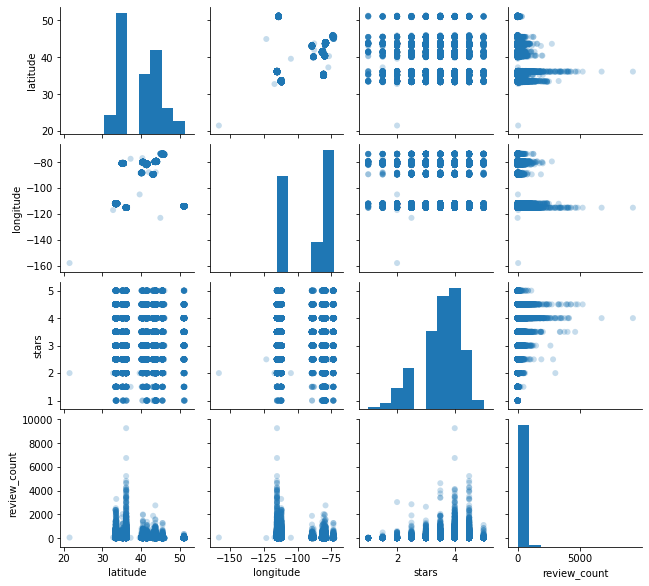

In [8]:
# Distribution of variables

sns.pairplot(restaurants, plot_kws=dict(alpha=.25, edgecolor='none'), height=2, aspect=1.1)

Text(0.5, 1, 'Correlation between numerical variables')

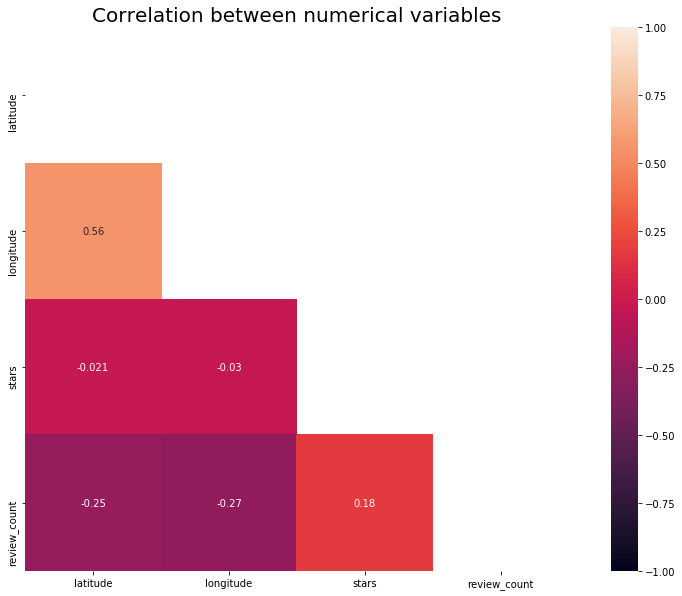

In [9]:
# Correlation between variables using heatmap

# Mask the upper triangle
mask = np.zeros_like(restaurants.corr())
mask[np.triu_indices_from(mask)] = True

# Set dimensions
f, ax = plt.subplots(figsize=(15, 10))

# Create a diverging palette
cmap = sns.diverging_palette(255,10, as_cmap=True)
#Plot the heatmap
ax = sns.heatmap(restaurants.corr(), mask=mask, vmax=1, vmin=-1, square=True, annot=True, ax=ax)
ax.set_title('Correlation between numerical variables', size=20)

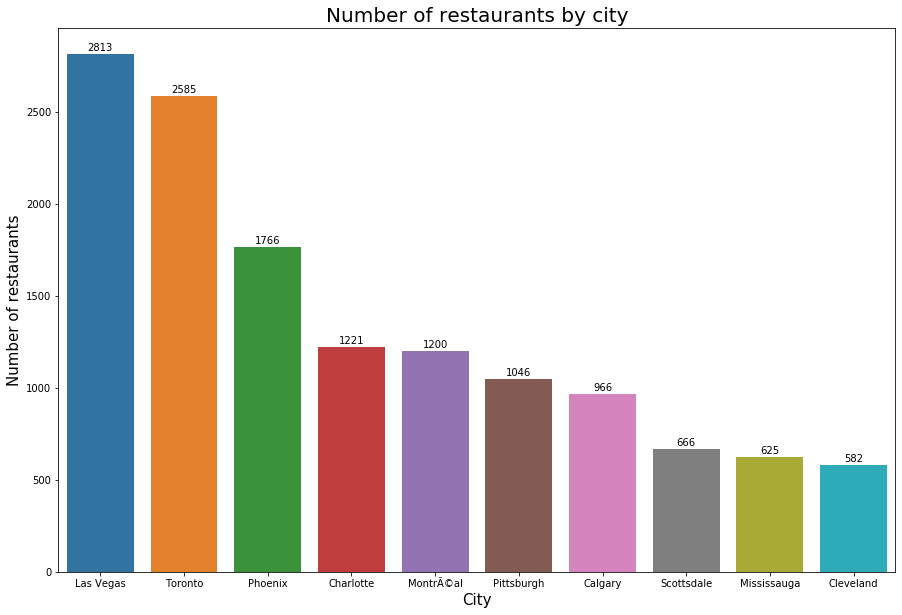

In [108]:
# Number of restaurants in the top 10 cities

x= restaurants['city'].value_counts().head(10)

plt.figure(figsize=(15,10))
ax= sns.barplot(x=x.index, y=x.values, data=restaurants)
ax.set_title('Number of restaurants by city', size=20)
ax.set_ylabel('Number of restaurants', size=15)
ax.set_xlabel('City', size=15)

# adding the text labels
rects = ax.patches
labels = restaurants['city'].value_counts().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

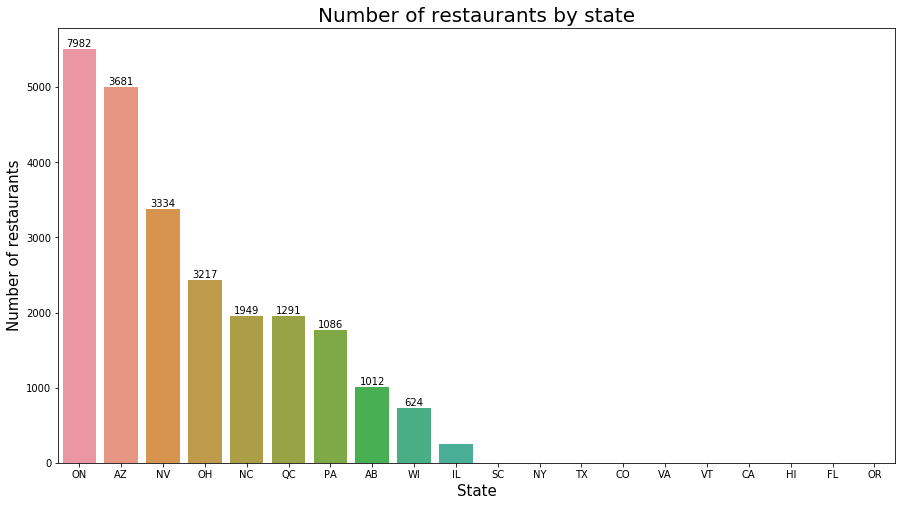

In [12]:
# Number of restaurants in each state

x= restaurants['state'].value_counts().head(10)

plt.figure(figsize=(15,8))
ax= sns.barplot(x=x.index, y=x.values, data=restaurants, order=restaurants['state'].value_counts().index)
ax.set_title('Number of restaurants by state', size=20)
ax.set_ylabel('Number of restaurants', size=15)
ax.set_xlabel('State', size=15)

# adding the text labels
rects = ax.patches
labels = restaurants['categories'].value_counts().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

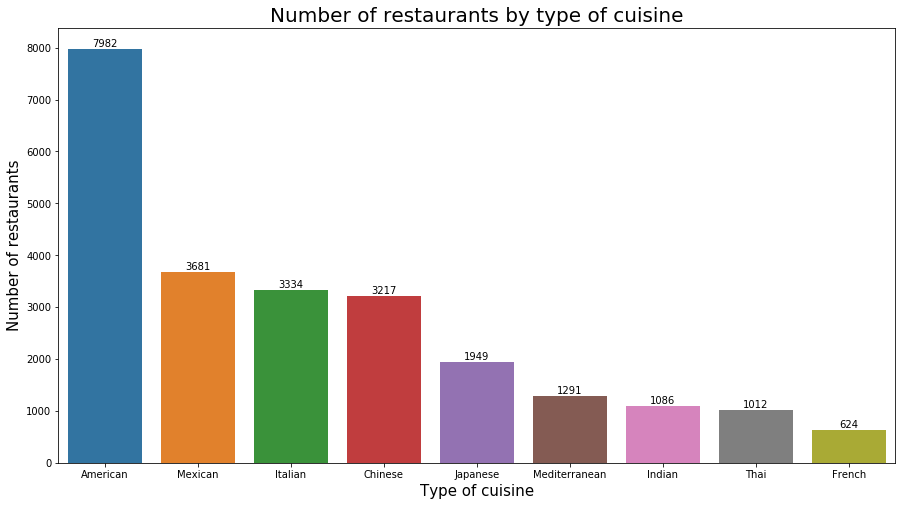

In [13]:
# Number of restaurants by type of cuisine

plt.figure(figsize=(15,8))
ax= sns.countplot(x='categories', data=restaurants, order=restaurants['categories'].value_counts().index)
ax.set_title('Number of restaurants by type of cuisine', size=20)
ax.set_ylabel('Number of restaurants', size=15)
ax.set_xlabel('Type of cuisine', size=15)

# adding the text labels
rects = ax.patches
labels = restaurants['categories'].value_counts().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

In [14]:
list_of_states = ['ON', 'AZ', 'NV', 'OH', 'NC', 'QC', 'PA', 'AB', 'WI', 'IL']
popular = restaurants[['name','state','review_count', 'categories']][restaurants['state'].isin(list_of_states)]

for i in range(len(list_of_states)):
    print(f'State: {list_of_states[i]} \n')
    top10 = popular[['name','review_count']][popular['state']==list_of_states[i]].sort_values(by='review_count',ascending=False).head(6)
    print(top10, '\n')

State: ON 

                               name  review_count
23481     Pai Northern Thai Kitchen          2758
13366        KINKA IZAKAYA ORIGINAL          1592
23851                 Khao San Road          1542
2353   Seven Lives Tacos Y Mariscos          1285
13127           Momofuku Noodle Bar          1010
16076           Momofuku Noodle Bar          1010 

State: AZ 

                       name  review_count
10260               Bobby Q          3302
19258       Pizzeria Bianco          2527
10981    Four Peaks Brewing          2400
4008       Joe's Farm Grill          2369
5510   Rehab Burger Therapy          2369
16981      Joe's Farm Grill          2369 

State: NV 

                                name  review_count
20512                   Mon Ami Gabi          9264
6820              Hash House A Go Go          6751
7319                Earl of Sandwich          5232
4497   Yardbird Southern Table & Bar          4828
7066    Gordon Ramsay Hell's Kitchen          4672
9234      

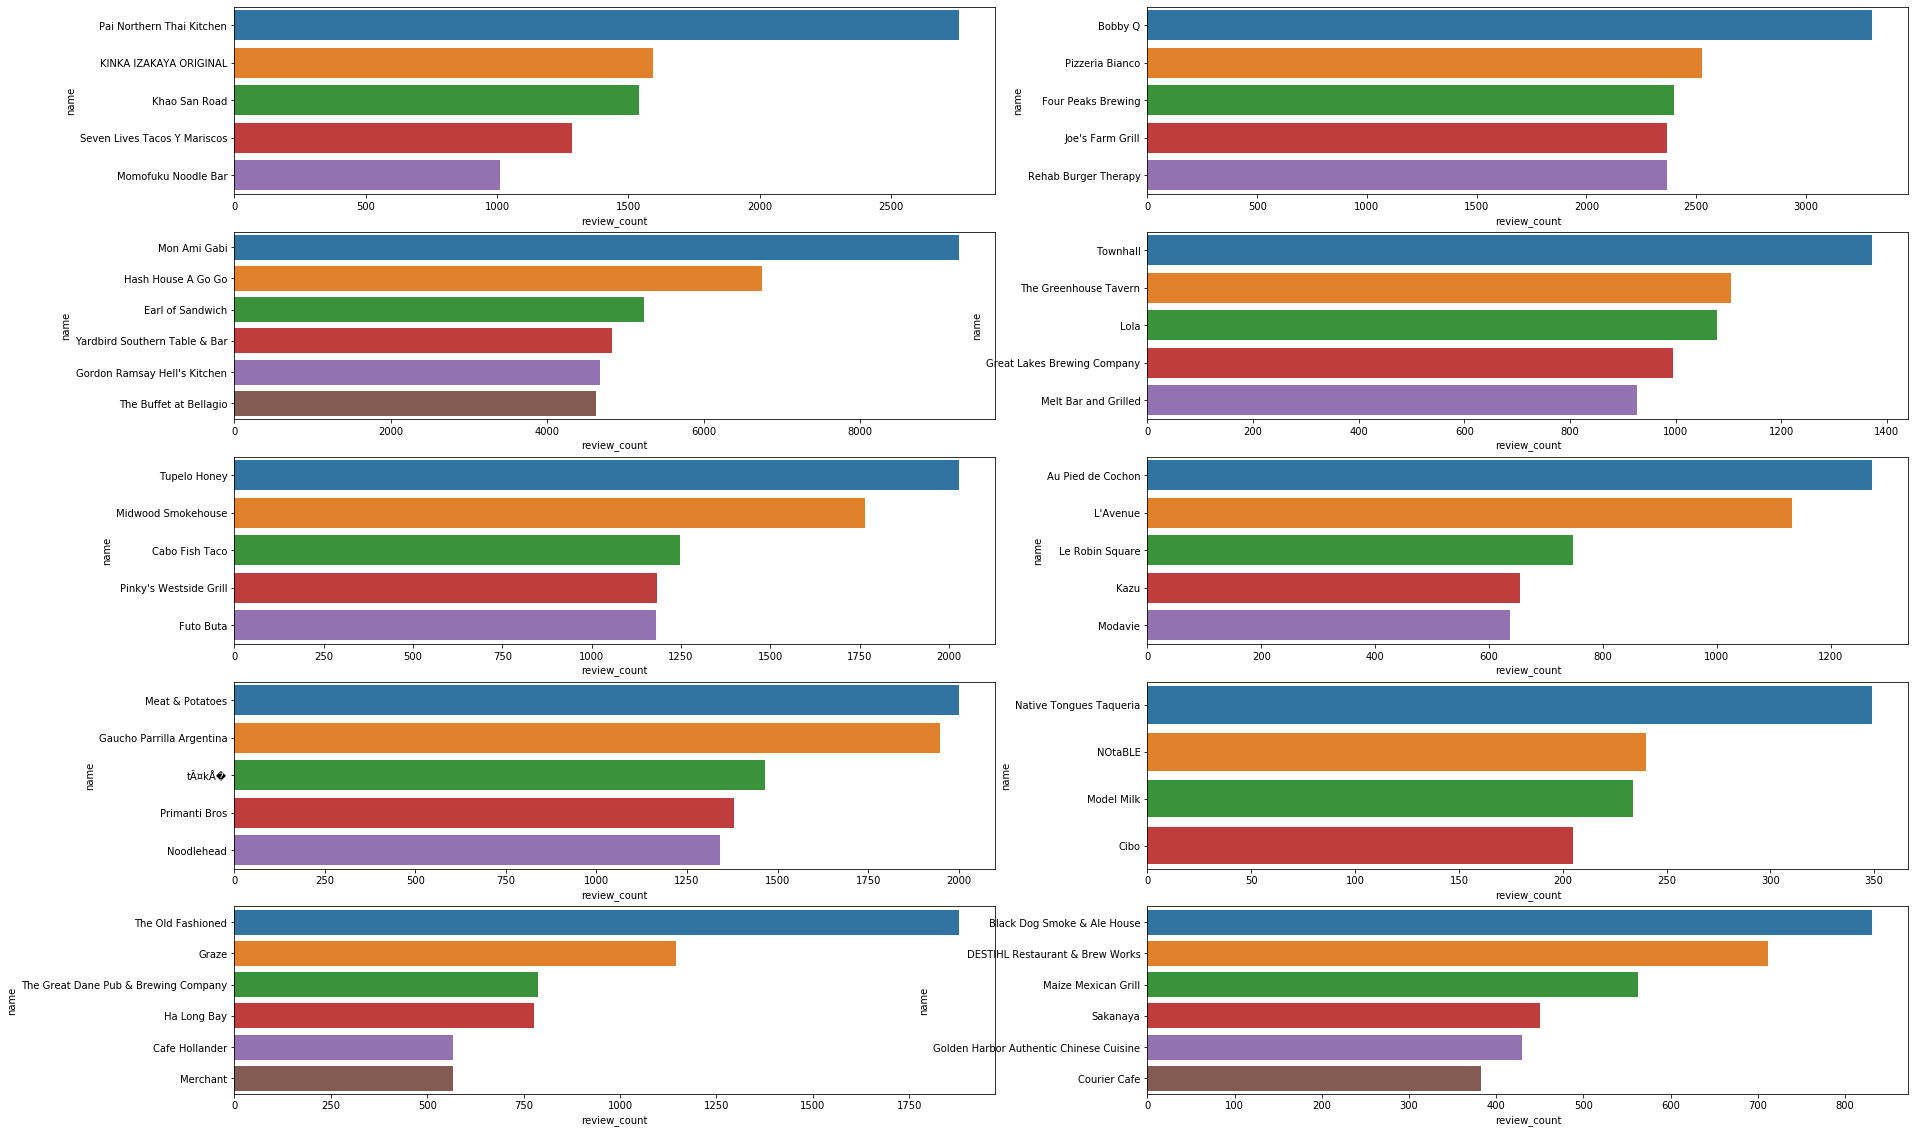

In [15]:
# Most visited restaurants in each state

plt.figure(figsize=(30,20))
for i in range(len(list_of_states)):
    plt.subplot(5,2, i+1)
    ax.set_title(list_of_states[i])
    top10 = popular[['name','review_count']][popular['state']==list_of_states[i]].sort_values(by='review_count',ascending=False).head(6)
    sns.barplot(y='name', x='review_count', data=top10)

In [17]:
# Most visited restaurants in each state
list_cuisines = restaurants['categories'].unique()

for i in range(len(list_cuisines)):
    print(f'Cuisine: {list_cuisines[i]} \n')
    top10 = popular[['name','review_count']][popular['categories']==list_cuisines[i]].sort_values(by='review_count',ascending=False).head(6)
    print(top10, '\n')

Cuisine: Mexican 

                                name  review_count
1341                     Nacho Daddy          4276
1921                  Tacos El Gordo          4016
1251               El Dorado Cantina          3928
291                       Mesa Grill          3533
3417            The Mission Old Town          2190
3031  La Santisima Gourmet Taco Shop          2152 

Cuisine: American 

                               name  review_count
6820             Hash House A Go Go          6751
7319               Earl of Sandwich          5232
4497  Yardbird Southern Table & Bar          4828
7066   Gordon Ramsay Hell's Kitchen          4672
9234         The Buffet at Bellagio          4628
6517                    Nacho Daddy          4276 

Cuisine: Japanese 

                              name  review_count
11848     Gangnam Asian BBQ Dining          3512
12040  Monta Japanese Noodle House          2841
12861       SUSHISAMBA - Las Vegas          2636
11695                       Sakana

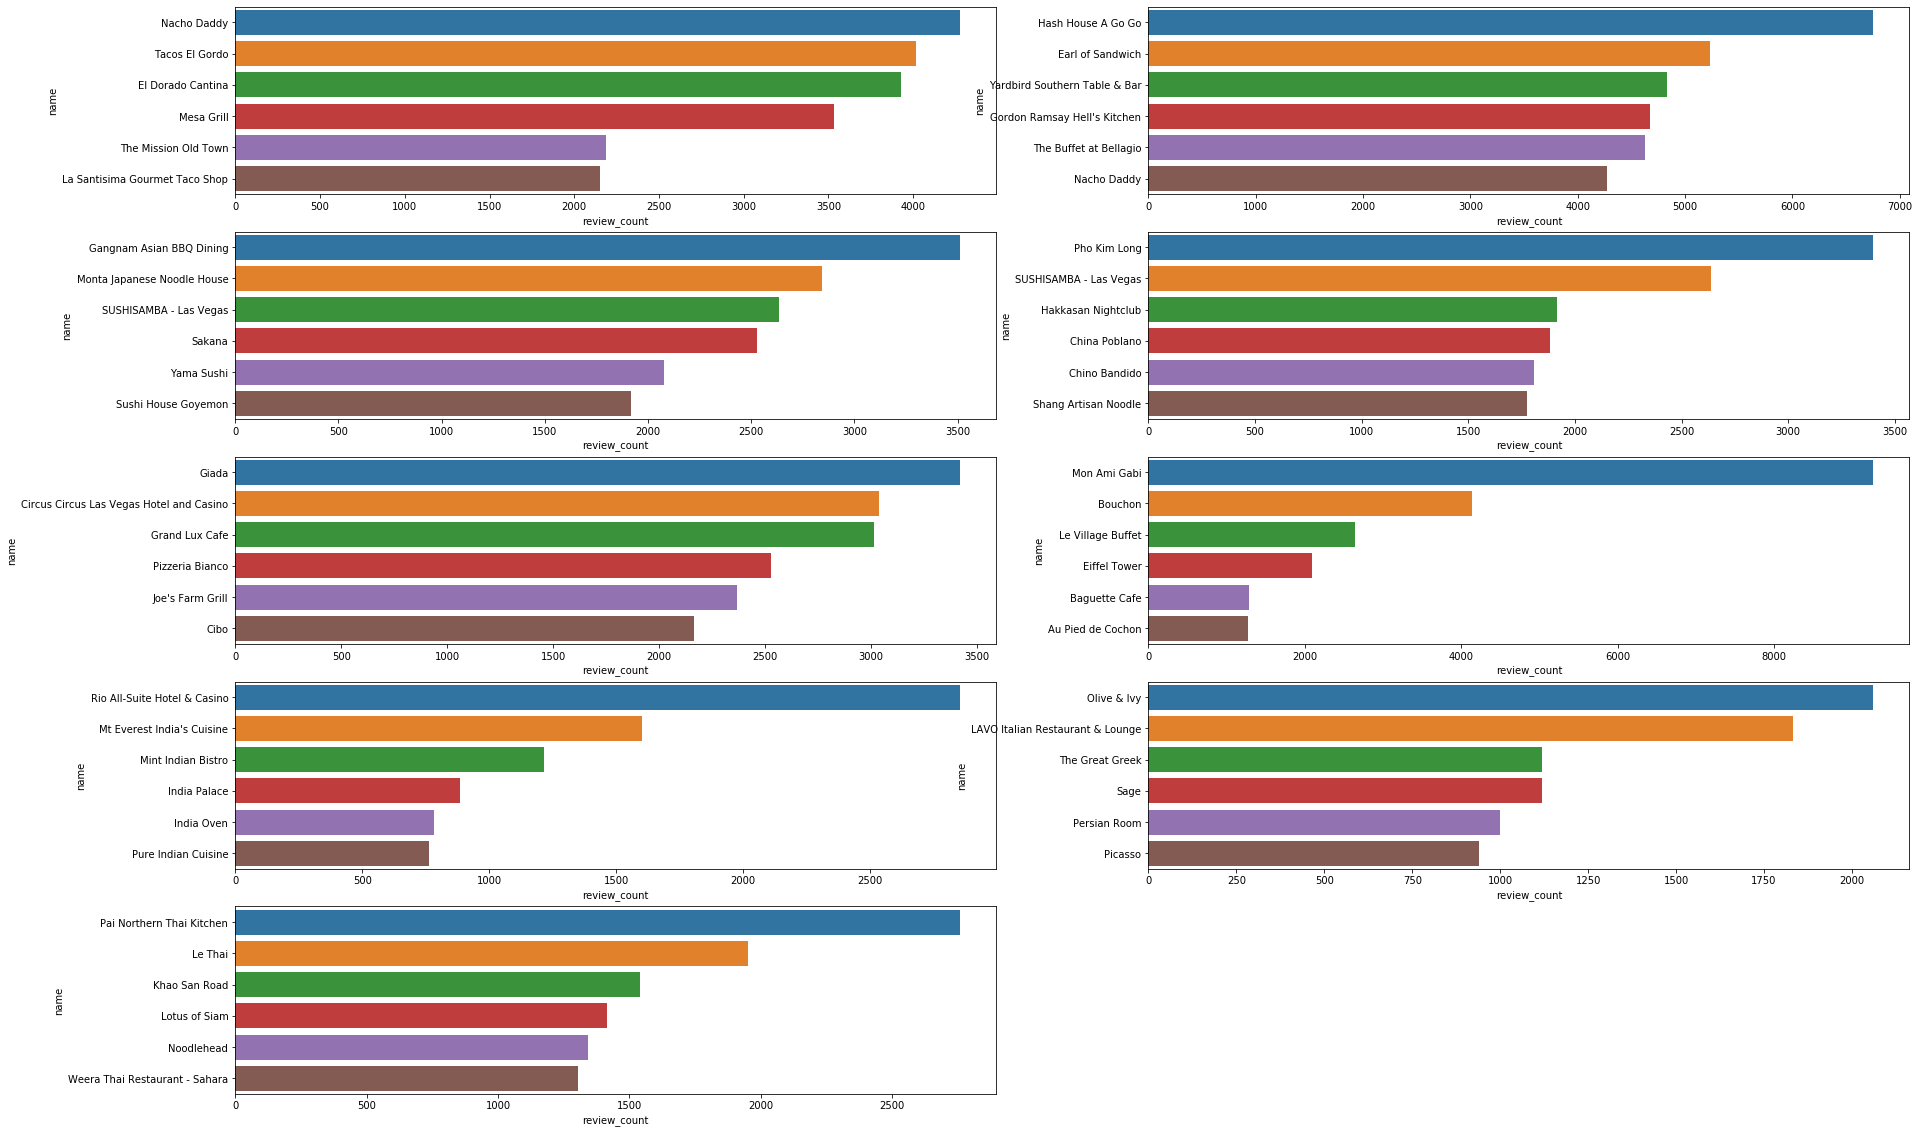

In [18]:
plt.figure(figsize=(30,20))
for i in range(len(list_cuisines)):
    plt.subplot(5,2, i+1)
    top10 = popular[['name','review_count']][popular['categories']==list_cuisines[i]].sort_values(by='review_count',ascending=False).head(6)
    sns.barplot(y='name', x='review_count', data=top10,)
    ax.set_title(list_cuisines[i], size=10)

Text(0.5, 1.0, 'Distributing of restaurant ratings')

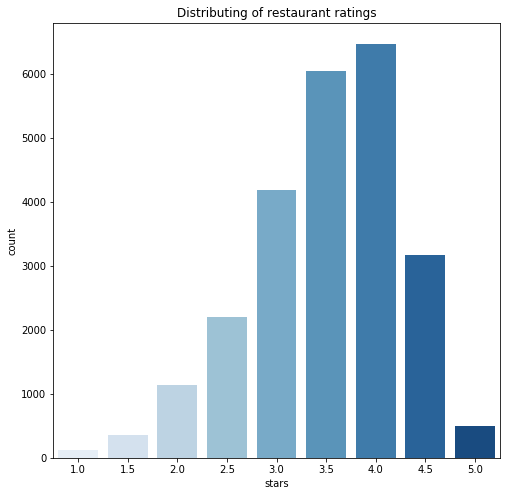

In [19]:
# Star distribution

plt.figure(figsize=(8,8))
sns.countplot(x='stars', data=restaurants, palette='Blues')
plt.title('Distributing of restaurant ratings')

Text(0.5, 22.200000000000003, 'State')

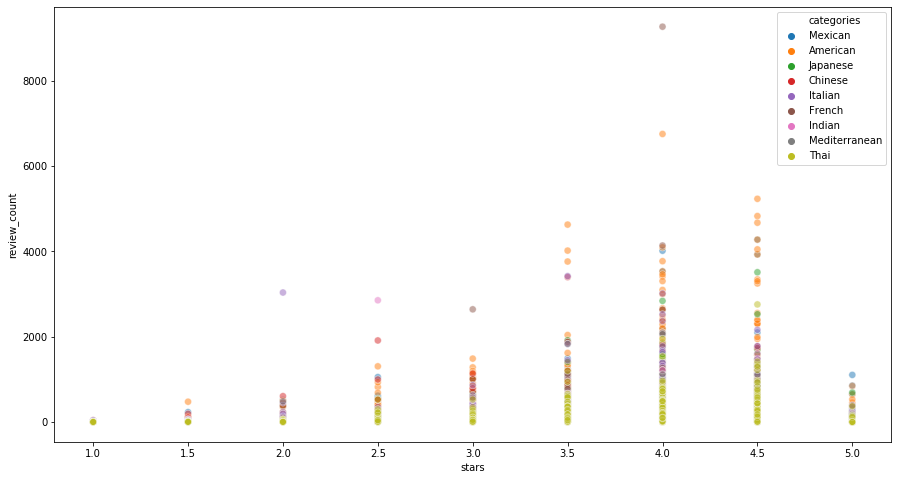

In [20]:
# Relation between stars and review_count

plt.figure(figsize=(15,8))
sns.scatterplot(y='review_count', x='stars', data=restaurants, hue='categories', alpha=0.5, s=50)
ax.set_title('Stars and number of reviews', size=20)
ax.set_ylabel('Number of restaurants', size=15)
ax.set_xlabel('State', size=15)

Text(0.5, 22.200000000000003, 'State')

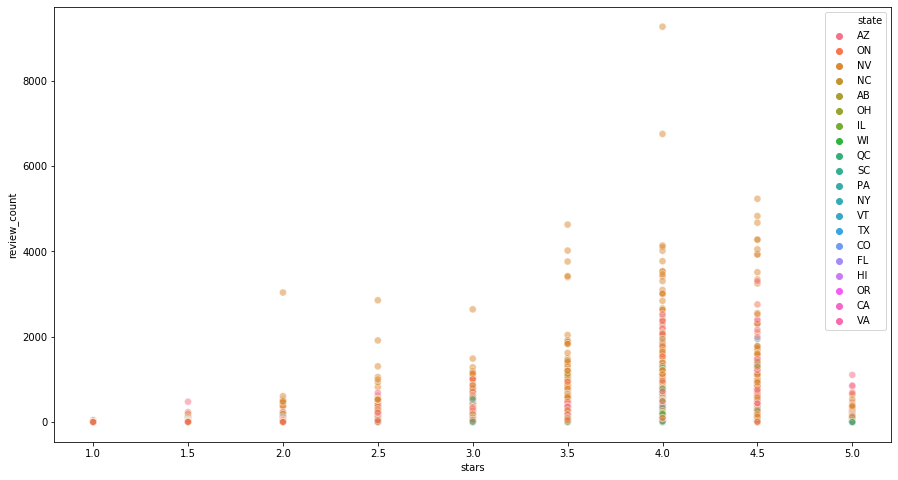

In [21]:
# Distribution of star in each state

plt.figure(figsize=(15,8))
sns.scatterplot(y='review_count', x='stars', data=restaurants, hue='state', alpha=0.5, s=50)
ax.set_title('Stars and number of reviews', size=20)
ax.set_ylabel('Number of restaurants', size=15)
ax.set_xlabel('State', size=15)

## Reviews

In [23]:
reviews = pd.read_csv('../data/yelp_reviews_restaurant.csv')

In [24]:
# For exploratory analysis we only take the following columns in the original dataset
# (user_id, review_stars, useful, funny, cool, text, date) 
# and the city, categories and name from business

reviews = reviews[['user_id', 'review_stars', 'useful', 'funny', 'cool', 'text', 'date', 'name', 'city', 'categories']]
reviews.head()

,user_id,review_stars,useful,funny,cool,text,date,name,city,categories
0,V34qejxNsCbcgD8C0HVk-Q,5,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11,Liberty Village Market & Cafe,Toronto,American
1,zFCuveEe6M-ijY1iy23IJg,5,6,2,5,"We walked into Melt. ""Did you want to put your...",2011-08-25 04:24:23,Liberty Village Market & Cafe,Toronto,American
2,4V985R3RG-rv0B7WCPQzeQ,1,1,0,0,I commented on how slow the service was last A...,2015-03-04 20:37:43,Liberty Village Market & Cafe,Toronto,American
3,nFGcoL6wuPQzxsNJVSfGrA,4,2,0,0,We walked in off the streets on a September ni...,2014-09-10 01:38:55,Liberty Village Market & Cafe,Toronto,American
4,CJqgUQeWhdgbDyLAFy7xvQ,4,0,0,0,Brunch on Saturday was excellent. The Bloody M...,2018-01-21 18:50:29,Liberty Village Market & Cafe,Toronto,American


In [25]:
print(f'The dataset has {reviews.shape[0]} rows and {reviews.shape[1]} columns')

The dataset has 2841386 rows and 10 columns


In [26]:
# Description of datatypes

reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2841386 entries, 0 to 2841385
Data columns (total 10 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   user_id       object
 1   review_stars  int64 
 2   useful        int64 
 3   funny         int64 
 4   cool          int64 
 5   text          object
 6   date          object
 7   name          object
 8   city          object
 9   categories    object
dtypes: int64(4), object(6)
memory usage: 216.8+ MB


In [27]:
# Percentage of null values

reviews.isnull().mean().round(4)

user_id         0.0
review_stars    0.0
useful          0.0
funny           0.0
cool            0.0
text            0.0
date            0.0
name            0.0
city            0.0
categories      0.0
dtype: float64

In [42]:
n_ratings = reviews.shape[0]
n_restaurants = reviews['name'].nunique()
n_users = reviews['user_id'].nunique()

print(f'Number of ratings: {n_ratings}')
print(f'Number of unique restaurants: {n_restaurants}')
print(f'Number of unique users: {n_users}')
print(f'Average number of ratings per user: {round(n_ratings/n_users, 2)}')
print(f'Average number of ratings per restaurant: {round(n_ratings/n_restaurants, 2)}')

Number of ratings: 2841386
Number of unique restaurants: 15162
Number of unique users: 1015461
Average number of ratings per user: 2.8
Average number of ratings per restaurant: 187.4


Mean rating per user: 3.75.
Mean rating per restaurant: 3.57.


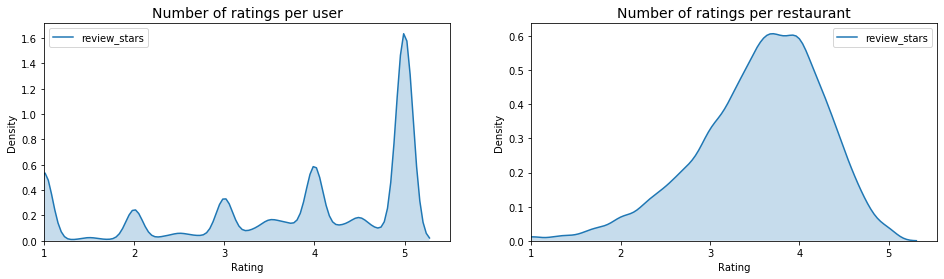

In [71]:
plt.figure(figsize=(16,4))

# Mean rating by restaurant
plt.subplot(1,2,1)
mean_rating_user = reviews.groupby('user_id')['review_stars'].mean()
sns.kdeplot(mean_rating_user, shade=True)
plt.xlim(1)
plt.title('Number of ratings per user', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Density')

print(f'Mean rating per user: {round(mean_rating_user.mean(), 2)}.')

# Mean rating by restaurant
plt.subplot(1,2,2)
mean_rating_restaurant = reviews.groupby('name')['review_stars'].mean()
sns.kdeplot(mean_rating_restaurant, shade=True)
plt.xlim(1)
plt.title('Number of ratings per restaurant', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Density')

print(f'Mean rating per restaurant: {round(mean_rating_restaurant.mean(), 2)}.')


In [64]:
n_ratings_per_user = reviews.groupby('user_id')['review_stars'].count()
n_ratings_per_restaurant = reviews.groupby('name')['review_stars'].count()

Text(0, 0.5, 'Density')

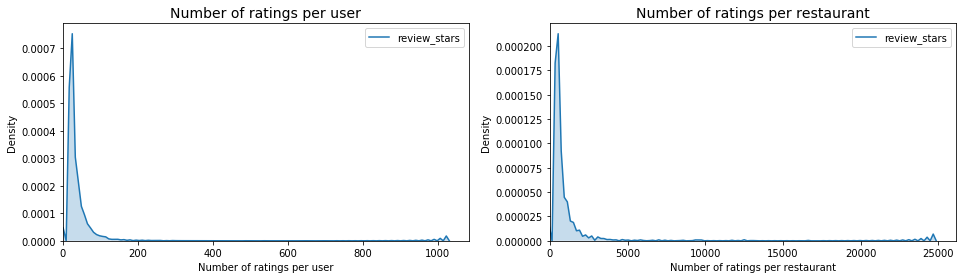

In [68]:
# Distribution of number of reviews per restaurant and user

plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.kdeplot(n_ratings_per_user, shade=True)
plt.xlim(0)
plt.title('Number of ratings per user', fontsize=14)
plt.xlabel('Number of ratings per user')
plt.ylabel('Density')

plt.subplot(1,2,2)
sns.kdeplot(n_ratings_per_restaurant, shade=True)
plt.xlim(0)
plt.title('Number of ratings per restaurant', fontsize=14)
plt.xlabel('Number of ratings per restaurant')
plt.ylabel('Density')

In [37]:
# Top 10 users in Yelp

top_users = reviews.groupby('user_id').agg({'review_stars':['count','mean'], 'date':['min', 'max'], 'useful':'sum', 
                                            'funny': 'sum', 'cool':'sum'})

In [53]:
print('Top 10 users in Yelp')
top_users.sort_values(('review_stars','count'), ascending=False).head(10)

Top 10 users in Yelp


review_stars                           date  \
                              count      mean                  min   
user_id                                                              
CxDOIDnH8gp9KXzpBHJYXw         1031  3.216295  2009-11-09 21:41:13   
ELcQDlf69kb-ihJfxZyL0A          901  3.166482  2011-05-24 22:54:40   
bLbSNkLggFnqwNNzzq-Ijw          769  3.443433  2012-05-20 19:50:41   
U4INQZOPSUaj8hMjLlZ3KA          673  4.193165  2008-06-01 02:19:17   
d_TBs6J3twMy9GChqUEXkg          597  3.460637  2010-12-27 21:00:05   
PKEzKWv_FktMm2mGPjwd0Q          560  3.683929  2009-07-27 21:18:15   
DK57YibC5ShBmqQl97CKog          538  3.750929  2006-02-12 09:00:17   
cMEtAiW60I5wE_vLfTxoJQ          527  4.081594  2009-06-12 01:46:33   
V-BbqKqO8anwplGRx9Q5aQ          484  3.435950  2011-03-09 18:11:14   
MMf0LhEk5tGa1LvN7zcDnA          416  3.293269  2010-07-18 03:49:08   

                                            useful funny  cool  
                                        max    sum   sum   sum  
user_id                                                         
CxDOIDnH8gp9KXzpBHJYXw  2019-12-12 14:40:20   4647  1666  2651  
ELcQDlf69kb-ihJfxZyL0A  2019-12-11 21:47:57   1468   843   814  
bLbSNkLggFnqwNNzzq-Ijw  2019-11-19 17:37:28  11377  5523  8002  
U4INQZOPSUaj8hMjLlZ3KA  2019-12-03 12:24:36   5422  2392  4063  
d_TBs6J3twMy9GChqUEXkg  2019-11-20 13:39:24   1453   692   924  
PKEzKWv_FktMm2mGPjwd0Q  2019-11-29 19:22:46   5657  2530  4088  
DK57YibC5ShBmqQl97CKog  2019-12-10 17:11:09   9296  5212  8127  
cMEtAiW60I5wE_vLfTxoJQ  2018-07-31 14:50:26   1012   406   817  
V-BbqKqO8anwplGRx9Q5aQ  2019-12-08 22:08:39   2302  1077  1619  
MMf0LhEk5tGa1LvN7zcDnA  2019-12-11 13:59:37   4398  1655  3367

In [56]:
# Identify the 10 most influential users

print('Top 10 influential users')
top_users.sort_values([('useful','sum')], ascending=False).head(10)

Top 10 influential users


review_stars                           date  \
                              count      mean                  min   
user_id                                                              
zFYs8gSUYDvXkb6O7YkRkw          288  3.715278  2009-09-15 12:56:39   
bLbSNkLggFnqwNNzzq-Ijw          769  3.443433  2012-05-20 19:50:41   
DK57YibC5ShBmqQl97CKog          538  3.750929  2006-02-12 09:00:17   
8DEyKVyplnOcSKx39vatbg          251  3.944223  2007-09-27 01:09:05   
Mfmx6DSGOrJjr4jeWmqCuw          229  4.148472  2016-12-25 00:40:05   
PcvbBOCOcs6_suRDH7TSTg          363  4.057851  2012-08-16 03:38:26   
I-4KVZ9lqHhk8469X9FvhA          198  4.823232  2017-11-02 22:58:09   
a85qPvr6L63PF0v9Zs8ZAg          165  3.569697  2014-06-06 21:59:35   
A0j21z2Q1HGic7jW6e9h7A          242  3.541322  2010-07-10 00:20:07   
oeAhRa8yFa9jtrhaHnOyxQ          240  4.058333  2009-06-15 19:31:54   

                                            useful  funny   cool  
                                        max    sum    sum    sum  
user_id                                                           
zFYs8gSUYDvXkb6O7YkRkw  2019-12-04 18:12:07  18707  13049  17623  
bLbSNkLggFnqwNNzzq-Ijw  2019-11-19 17:37:28  11377   5523   8002  
DK57YibC5ShBmqQl97CKog  2019-12-10 17:11:09   9296   5212   8127  
8DEyKVyplnOcSKx39vatbg  2019-11-04 19:55:49   8732   5808   6992  
Mfmx6DSGOrJjr4jeWmqCuw  2019-12-07 19:18:38   7041   3182   6519  
PcvbBOCOcs6_suRDH7TSTg  2019-12-08 20:41:54   6868   3433   6476  
I-4KVZ9lqHhk8469X9FvhA  2019-11-18 19:43:31   6459   3484   6075  
a85qPvr6L63PF0v9Zs8ZAg  2019-09-19 07:23:00   6441   3007   5508  
A0j21z2Q1HGic7jW6e9h7A  2019-11-11 01:40:28   6073   4205   5438  
oeAhRa8yFa9jtrhaHnOyxQ  2019-09-30 16:47:00   5932   4258   5421

In [92]:
# Calculate the bayesian average to know the best restaurants

restaurant_stats = reviews.groupby('name')['review_stars'].agg(['count', 'mean'])
restaurant_stats.head()

,count,mean
name,,
China,63,2.587302
&Company Resto Bar,2036,4.370334
1 Pot,6,3.833333
100th Bomb Group,195,3.071795
107 State,962,3.722453


In [93]:
C = restaurant_stats['count'].mean()
m = restaurant_stats['mean'].mean()

def bayesian_avg(ratings):
    bayesian_avg = (C * m + ratings.sum())/(C + ratings.count())
    return bayesian_avg

bayesian_avg_ratings = reviews.groupby('name')['review_stars'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['name', 'bayesian_avg']
restaurant_stats = restaurant_stats.merge(bayesian_avg_ratings, on='name')
restaurant_stats.head()

,name,count,mean,bayesian_avg
0,China,63,2.587302,3.319237
1,&Company Resto Bar,2036,4.370334,4.302480
2,1 Pot,6,3.833333,3.573611
3,100th Bomb Group,195,3.071795,3.313642
4,107 State,962,3.722453,3.696830


In [96]:
# 10 best restaurants based on bayesian_avg

restaurant_stats.sort_values('bayesian_avg', ascending=False).head(10)

,name,count,mean,bayesian_avg
2785,Cocina Madrigal,1141,4.864154,4.680920
9947,Pia's Sports Bar & Grill,3434,4.656377,4.599916
12626,TORA,720,4.834722,4.572553
841,Bajamar Seafood & Tacos,672,4.830357,4.554497
5143,Gypsy Bar,868,4.761521,4.549114
1607,Brooklyn V's Pizza- Chandler,1362,4.675477,4.541200
14823,Wraps N Curry,891,4.731762,4.529057
332,All-American Bar And Grille,664,4.799699,4.527995
1474,Boodles,988,4.689271,4.510069
6244,Juan's Flaming Fajitas & Cantina,2296,4.567073,4.491477


In [97]:
# 10 worst restaurants based on bayesian_avg

restaurant_stats.sort_values('bayesian_avg', ascending=True).head(10)

,name,count,mean,bayesian_avg
14692,Wild Rosemary,487,1.694045,2.214026
2133,Casa Capitano,3123,2.249440,2.323930
7901,Mandarin Restaurant - Toronto,473,1.894292,2.368472
12583,Szechuan Noodle Bowl,617,2.012966,2.374613
10137,Play Arcade and Kitchen,426,1.917840,2.421158
6884,La Patrona Mexican Cuisine,523,2.101338,2.487526
14682,Wild Elk Den,369,2.065041,2.570342
4846,Golden Kitchen,1960,2.519388,2.610663
6705,La Belle Terre Bakery & CafÃ©,2951,2.558455,2.618576
7727,Maddy's Paddy Cafe,949,2.448894,2.632997


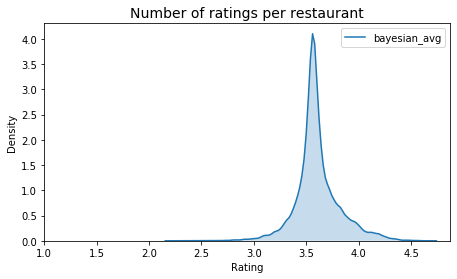

Mean rating per restaurant: 3.57.


In [100]:
plt.figure(figsize=(16,4))

# Mean rating by restaurant
plt.subplot(1,2,2)
#mean_rating_restaurant = reviews.groupby('name')['review_stars'].mean()
sns.kdeplot(restaurant_stats['bayesian_avg'], shade=True)
plt.xlim(1)
plt.title('Number of ratings per restaurant', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

print(f'Mean rating per restaurant: {round(mean_rating_restaurant.mean(), 2)}.')

In [174]:
from folium.plugins import HeatMap

# Location of restaurants in Las Vegas

data = list()
rating_list = list(restaurants['stars'].unique())

subset = restaurants[['latitude', 'longitude', 'stars']][restaurants['city'] == 'Las Vegas']

BBox = ((subset['longitude'].min(), subset['longitude'].max(),
         subset['latitude'].min(), subset['latitude'].max()))

                
lat = subset['latitude'].mean()
lon = subset['longitude'].mean()
zoom_start = 11

m = folium.Map(location=[lat, lon], tiles='OpenStreetMap', zoom_start=zoom_start)

HeatMap(subset, radius=7, max_zoom=11, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'yellow', 0.8: 'orange', 1: 'red'}).add_to(m)

m

In [172]:
# Location of restaurants in Toronto

data = list()
rating_list = list(restaurants['stars'].unique())

subset = restaurants[['latitude', 'longitude', 'stars']][restaurants['city'] == 'Toronto']

BBox = ((subset['longitude'].min(), subset['longitude'].max(),
         subset['latitude'].min(), subset['latitude'].max()))

                
lat = subset['latitude'].mean()
lon = subset['longitude'].mean()
zoom_start = 11

m = folium.Map(location=[lat, lon], tiles='OpenStreetMap', zoom_start=zoom_start)

HeatMap(subset, radius=7, max_zoom=11, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'yellow', 0.8: 'orange', 1: 'red'}).add_to(m)

m

In [173]:
# Location of restaurants in Phoenix

data = list()
rating_list = list(restaurants['stars'].unique())

subset = restaurants[['latitude', 'longitude', 'stars']][restaurants['city'] == 'Phoenix']

BBox = ((subset['longitude'].min(), subset['longitude'].max(),
         subset['latitude'].min(), subset['latitude'].max()))

                
lat = subset['latitude'].mean()
lon = subset['longitude'].mean()
zoom_start = 11

m = folium.Map(location=[lat, lon], tiles='OpenStreetMap', zoom_start=zoom_start)

HeatMap(subset, radius=7, max_zoom=13, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'yellow', 0.8: 'orange', 1: 'red'}).add_to(m)

m

(-115.35134199999999, -114.89648999999999, 35.9208835, 36.381902000000004)


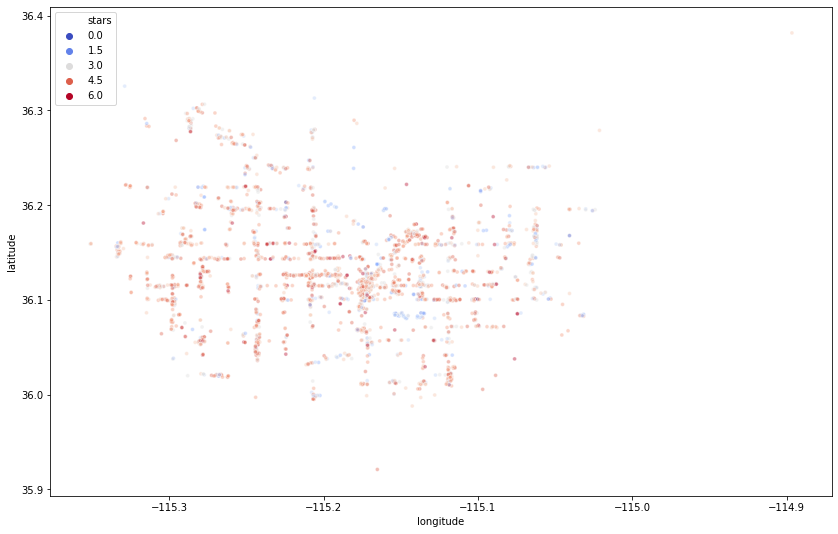

In [156]:
# Map of the 4 cities with most restaurants (color rating)

data = list()
rating_list = list(restaurants['stars'].unique())

subset = restaurants[['latitude', 'longitude', 'stars']][restaurants['city'] == 'Las Vegas']

BBox = ((subset['longitude'].min(), subset['longitude'].max(),
         subset['latitude'].min(), subset['latitude'].max()))

print(BBox)
                
lat = subset['latitude'].mean()
lon = subset['longitude'].mean()
zoom_start = 11

fig, ax = plt.subplots(figsize= (14,9))

sns.scatterplot(subset.longitude, subset.latitude, alpha=0.4, hue=subset.stars, palette='coolwarm', s=15)

In [ ]:
# Graph of conection between users???

In [ ]:
# Preprocessing

# Most common words in reviews (sentiment analysis??)